## **Model 15: Model 11 (Adam + batch size 16) + L2 weight regularization**

**Preprocessing with batch size = 16**

In [2]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 16
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [2]:
def build_medium_cnn_leakyrelu_l2(input_shape=(128,128,3), num_classes=4, l2_lambda=1e-4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same',
                      kernel_regularizer=regularizers.l2(l2_lambda),
                      input_shape=input_shape),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same',
                      kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same',
                      kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build Model 15
model15 = build_medium_cnn_leakyrelu_l2()
model15.summary()

d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

**Callbacks**

In [3]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='models/model15_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

**Compile**

In [4]:
model15.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [5]:
history15 = model15.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6750 - loss: 0.8299
Epoch 1: val_loss improved from None to 0.48820, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.7546 - loss: 0.6614 - val_accuracy: 0.8486 - val_loss: 0.4882 - learning_rate: 0.0010
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8582 - loss: 0.4510
Epoch 2: val_loss improved from 0.48820 to 0.37355, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 0.8737 - loss: 0.4179 - val_accuracy: 0.8979 - val_loss: 0.3735 - learning_rate: 0.0010
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9226 - loss: 0.3326
Epoch 3: val_loss improved from 0.37355 to 0.35352, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.9270 - loss: 0.3231 - val_accuracy: 0.9120 - val_loss: 0.3535 - learning_rate: 0.0010
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9568 - loss: 0.2577
Epoch 4: val_loss did not improve from 0.35352
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 124ms/step - accuracy: 0.9517 - loss: 0.2683 - val_accuracy: 0.9049 - val_loss: 0.4039 - learning_rate: 0.0010
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9702 - loss: 0.2381
Epoch 5: val_loss improved from 0.35352 to 0.34349, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.9716 - loss: 0.2330 - val_accuracy: 0.9278 - val_loss: 0.3435 - learning_rate: 0.0010
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9737 - loss: 0.2233
Epoch 6: val_loss did not improve from 0.34349
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 0.9744 - loss: 0.2153 - val_accuracy: 0.9393 - val_loss: 0.3479 - learning_rate: 0.0010
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9761 - loss: 0.2051
Epoch 7: val_loss did not improve from 0.34349
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 0.9747 - loss: 0.2114 - val_accuracy: 0.9313 - val_loss: 0.3772 - learning_rate: 0.0010
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9860 - loss: 0.1877
Epoch 8: val_loss did not improve from 0.34349

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 127ms/step - accuracy: 0.9854 - loss: 0.1882 - val_ac

286/286 ━━━━━━━━━━━━━━━━━━━━ 37s 128ms/step - accuracy: 0.9917 - loss: 0.1568 - val_accuracy: 0.9463 - val_loss: 0.3087 - learning_rate: 5.0000e-04
Epoch 10/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9982 - loss: 0.1240
Epoch 10: val_loss improved from 0.30872 to 0.28569, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 0.9991 - loss: 0.1157 - val_accuracy: 0.9516 - val_loss: 0.2857 - learning_rate: 5.0000e-04
Epoch 11/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0981
Epoch 11: val_loss improved from 0.28569 to 0.26705, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 124ms/step - accuracy: 1.0000 - loss: 0.0933 - val_accuracy: 0.9551 - val_loss: 0.2671 - learning_rate: 5.0000e-04
Epoch 12/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0807
Epoch 12: val_loss improved from 0.26705 to 0.25957, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 1.0000 - loss: 0.0770 - val_accuracy: 0.9542 - val_loss: 0.2596 - learning_rate: 5.0000e-04
Epoch 13/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0668
Epoch 13: val_loss improved from 0.25957 to 0.25429, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 1.0000 - loss: 0.0637 - val_accuracy: 0.9516 - val_loss: 0.2543 - learning_rate: 5.0000e-04
Epoch 14/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0555
Epoch 14: val_loss improved from 0.25429 to 0.25265, saving model to models/model15_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 124ms/step - accuracy: 1.0000 - loss: 0.0530 - val_accuracy: 0.9481 - val_loss: 0.2526 - learning_rate: 5.0000e-04
Epoch 15/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9981 - loss: 0.0524
Epoch 15: val_loss did not improve from 0.25265
286/286 ━━━━━━━━━━━━━━━━━━━━ 35s 124ms/step - accuracy: 0.9891 - loss: 0.0797 - val_accuracy: 0.9208 - val_loss: 0.3563 - learning_rate: 5.0000e-04
Epoch 16/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9694 - loss: 0.1737
Epoch 16: val_loss did not improve from 0.25265
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.9784 - loss: 0.1455 - val_accuracy: 0.9410 - val_loss: 0.3102 - learning_rate: 5.0000e-04
Epoch 17/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9957 - loss: 0.0961
Epoch 17: val_loss did not improve from 0.25265

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
286/286 ━━━━━━━━━━━━━━━━━━━━ 36s 124ms/step - accuracy: 0.9939 - lo

**Load best model**

In [6]:
best_model15 = tf.keras.models.load_model('models/model15_best.h5')

**Evaluate**

In [7]:
# Evaluate on test set
test_loss, test_acc = best_model15.evaluate(test_ds)
print(f"Model 15 (L2 Reg) - Test accuracy: {test_acc:.4f}")
print(f"Model 15 (L2 Reg) - Test loss: {test_loss:.4f}")

# Training & validation metrics
final_train_acc = history15.history['accuracy'][-1]
final_train_loss = history15.history['loss'][-1]
final_val_acc   = history15.history['val_accuracy'][-1]
final_val_loss  = history15.history['val_loss'][-1]

print(f"Model 15 (L2 Reg) - Final training accuracy: {final_train_acc:.4f}")
print(f"Model 15 (L2 Reg) - Final training loss: {final_train_loss:.4f}")
print(f"Model 15 (L2 Reg) - Final validation accuracy: {final_val_acc:.4f}")
print(f"Model 15 (L2 Reg) - Final validation loss: {final_val_loss:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9527 - loss: 0.2585
Model 15 (L2 Reg) - Test accuracy: 0.9527
Model 15 (L2 Reg) - Test loss: 0.2585
Model 15 (L2 Reg) - Final training accuracy: 1.0000
Model 15 (L2 Reg) - Final training loss: 0.0683
Model 15 (L2 Reg) - Final validation accuracy: 0.9560
Model 15 (L2 Reg) - Final validation loss: 0.2545


**Loss curve plotting**

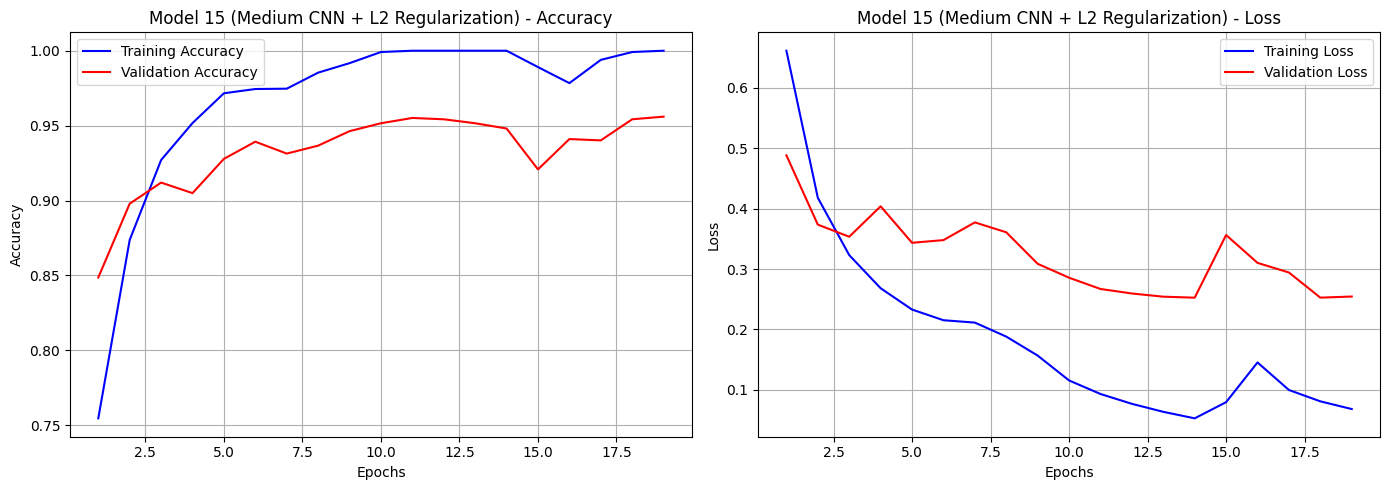

In [8]:
from plot import plot_training_curves

plot_training_curves(history15, model_name="Model 15 (Medium CNN + L2 Regularization)")

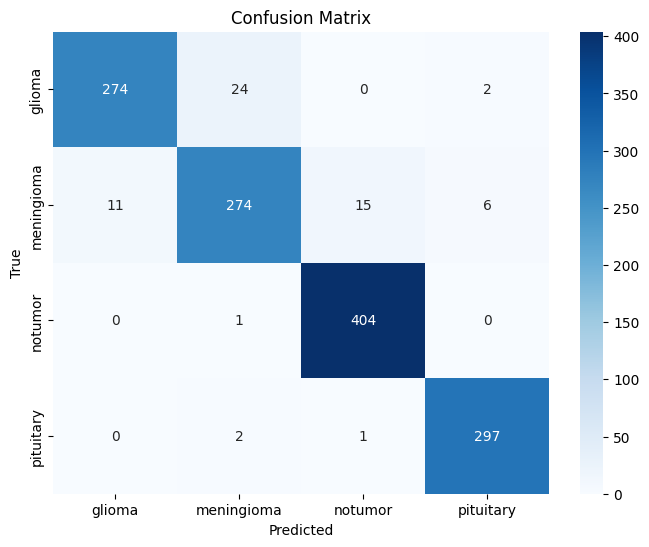


Classification Report:

              precision    recall  f1-score   support

      glioma       0.96      0.91      0.94       300
  meningioma       0.91      0.90      0.90       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [3]:
from plot_utils import (
    plot_training_curves,
    evaluate_model_with_confusion,
    plot_confusion_matrix_from_dataset
)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix with in-memory model
# evaluate_model_with_confusion(model19, test_ds, title="Confusion Matrix (Test)")

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model15_best.h5", test_ds, class_names)
